In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/LIPNLP

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/LIPNLP


In [2]:
import pandas as pd
import numpy as np
import dateutil
import time
import cv2
import os
from keras.preprocessing.sequence import TimeseriesGenerator


import matplotlib.pyplot as plt
plt.style.use('seaborn')


Using TensorFlow backend.


In [0]:
market = pd.read_csv('prices/apple_market.csv')
market['date'] = pd.to_datetime(market['date'])
market.head()

,date,open,high,low,close,volume
0,2006-12-01,13.114285,13.190000,12.871428,13.045714,198769900
1,2006-12-04,13.125714,13.150000,12.928572,13.017143,177384200
2,2006-12-05,13.092857,13.190000,12.981428,13.038571,165709600
3,2006-12-06,12.948571,13.055715,12.810000,12.832857,159546100
4,2006-12-07,12.861428,12.928572,12.414286,12.434286,251206900


Reshaping only OPEN column to generate charts, 10 days sequence

In [0]:
#generating sets, 10 days frequency
data_gen = TimeseriesGenerator(market['open'], market['date'], length=10, batch_size=2517, sampling_rate=1)

In [0]:
#shape of generated sequence
x, y = data_gen[0]
x.shape

(2507, 10)

In [0]:
tf = pd.DataFrame(x)
uf = pd.DataFrame(y)

res = pd.concat([tf, uf], axis=1, sort=False)
res.head()

,0,1,2,3,4,5,6,7,8,9,0
0,13.114285,13.125714,13.092857,12.948571,12.861428,12.461429,12.700000,12.658571,12.564285,12.721429,2006-12-15
1,13.125714,13.092857,12.948571,12.861428,12.461429,12.700000,12.658571,12.564285,12.721429,12.717143,2006-12-18
2,13.092857,12.948571,12.861428,12.461429,12.700000,12.658571,12.564285,12.721429,12.717143,12.518572,2006-12-19
3,12.948571,12.861428,12.461429,12.700000,12.658571,12.564285,12.721429,12.717143,12.518572,12.104285,2006-12-20
4,12.861428,12.461429,12.700000,12.658571,12.564285,12.721429,12.717143,12.518572,12.104285,12.352858,2006-12-21


Generating chart images and save them as png

In [0]:
for x in range(len(res)):
  fig = res.iloc[x,:9].plot().get_figure()
  plt.axis('off')
  filename = 'charts/' + str(res.iloc[x,10].date()) + '.png'
  fig.savefig(filename)
  fig.clf()

<Figure size 576x396 with 0 Axes>

In [0]:
#read generated images from disk
images_list = []
images_list += [os.path.join('charts',f) for f in os.listdir('charts') if f.endswith('.png')]

In [0]:
res['image_list'] = sorted(images_list)
res.head()

,0,1,2,3,4,5,6,7,8,9,0,image_list
0,13.114285,13.125714,13.092857,12.948571,12.861428,12.461429,12.700000,12.658571,12.564285,12.721429,2006-12-15,charts/2006-12-15.png
1,13.125714,13.092857,12.948571,12.861428,12.461429,12.700000,12.658571,12.564285,12.721429,12.717143,2006-12-18,charts/2006-12-18.png
2,13.092857,12.948571,12.861428,12.461429,12.700000,12.658571,12.564285,12.721429,12.717143,12.518572,2006-12-19,charts/2006-12-19.png
3,12.948571,12.861428,12.461429,12.700000,12.658571,12.564285,12.721429,12.717143,12.518572,12.104285,2006-12-20,charts/2006-12-20.png
4,12.861428,12.461429,12.700000,12.658571,12.564285,12.721429,12.717143,12.518572,12.104285,12.352858,2006-12-21,charts/2006-12-21.png


In [0]:
charts = res.iloc[:,10:12]
charts.columns = ['date', 'image_list']
charts.to_csv('charts/chart.csv')
charts.head()

,date,image_list
0,2006-12-15,charts/2006-12-15.png
1,2006-12-18,charts/2006-12-18.png
2,2006-12-19,charts/2006-12-19.png
3,2006-12-20,charts/2006-12-20.png
4,2006-12-21,charts/2006-12-21.png


In [0]:
charts = pd.read_csv('charts/chart.csv')
charts = [cv2.cvtColor(plt.imread(im,0), cv2.COLOR_BGR2GRAY) for im in charts['image_list']]

In [0]:
len(charts)

2507

In [0]:
charts = np.array(charts)
charts = charts[0:2502,]

In [0]:
charts.shape

(2502, 396, 576)

In [0]:
charts = charts.reshape(2502, 396, 576, 1)
charts.shape

(2502, 396, 576, 1)

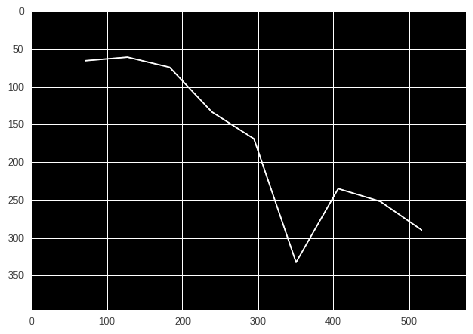

In [5]:
plt.imshow(charts[0])

In [0]:
np.save('chart_data', charts)